In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
540,6859-QNXIQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.1,8248.5,No
4980,8595-SIZNC,Female,1,Yes,No,22,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),25.6,548.8,No
905,0781-LKXBR,Male,1,No,No,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.5,918.6,Yes
5426,8630-QSGXK,Male,0,Yes,No,51,Yes,Yes,DSL,No,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),75.2,3901.25,No
4547,5339-TJFEK,Male,0,Yes,Yes,62,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,6487.2,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [33]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [35]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [42]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

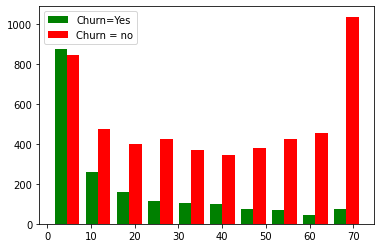

In [8]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure

tenure_churn_yes = df1[df1.Churn =='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],color = ['green','red'],label=['Churn=Yes','Churn = no'])
plt.legend()

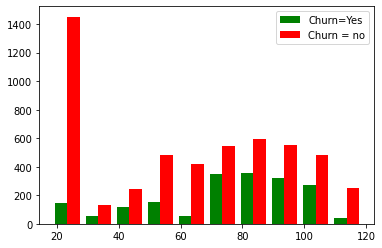

In [9]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges

mc_churn_yes = df1[df1.Churn =='Yes'].MonthlyCharges

plt.hist([mc_churn_yes,mc_churn_no],color = ['green','red'],label=['Churn=Yes','Churn = no'])
plt.legend()

In [10]:
def print_cols_unique_values(df):
    for column in df:
        print(column,df[column].unique(),sep='--->')

In [11]:
print_cols_unique_values(df1)

gender--->['Female' 'Male']
SeniorCitizen--->[0 1]
Partner--->['Yes' 'No']
Dependents--->['No' 'Yes']
tenure--->[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService--->['No' 'Yes']
MultipleLines--->['No phone service' 'No' 'Yes']
InternetService--->['DSL' 'Fiber optic' 'No']
OnlineSecurity--->['No' 'Yes' 'No internet service']
OnlineBackup--->['Yes' 'No' 'No internet service']
DeviceProtection--->['No' 'Yes' 'No internet service']
TechSupport--->['No' 'Yes' 'No internet service']
StreamingTV--->['No' 'Yes' 'No internet service']
StreamingMovies--->['No' 'Yes' 'No internet service']
Contract--->['Month-to-month' 'One year' 'Two year']
PaperlessBilling--->['Yes' 'No']
PaymentMethod--->['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges--->[29.85 56.95 53.85 

In [12]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [13]:
print_cols_unique_values(df1)

gender--->['Female' 'Male']
SeniorCitizen--->[0 1]
Partner--->['Yes' 'No']
Dependents--->['No' 'Yes']
tenure--->[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService--->['No' 'Yes']
MultipleLines--->['No' 'Yes']
InternetService--->['DSL' 'Fiber optic' 'No']
OnlineSecurity--->['No' 'Yes']
OnlineBackup--->['Yes' 'No']
DeviceProtection--->['No' 'Yes']
TechSupport--->['No' 'Yes']
StreamingTV--->['No' 'Yes']
StreamingMovies--->['No' 'Yes']
Contract--->['Month-to-month' 'One year' 'Two year']
PaperlessBilling--->['Yes' 'No']
PaymentMethod--->['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges--->[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges--->[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn--->['No' 'Yes']


In [14]:
yes_no_columns = []
for columns in df1:
    x = df1[columns].unique()
    if(sorted(x) == ['No','Yes']):
        yes_no_columns.append(columns)

for col in yes_no_columns:
    df1[col].replace({"Yes":1,"No":0},inplace=True)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [15]:
print_cols_unique_values(df1)
df1.shape

gender--->['Female' 'Male']
SeniorCitizen--->[0 1]
Partner--->[1 0]
Dependents--->[0 1]
tenure--->[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService--->[0 1]
MultipleLines--->[0 1]
InternetService--->['DSL' 'Fiber optic' 'No']
OnlineSecurity--->[0 1]
OnlineBackup--->[1 0]
DeviceProtection--->[0 1]
TechSupport--->[0 1]
StreamingTV--->[0 1]
StreamingMovies--->[0 1]
Contract--->['Month-to-month' 'One year' 'Two year']
PaperlessBilling--->[1 0]
PaymentMethod--->['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges--->[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges--->[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn--->[0 1]


(7032, 20)

In [16]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [17]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [18]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [19]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

df2[cols_to_scale] = MinMaxScaler().fit_transform(df2[cols_to_scale])

In [20]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5479,1,0,0,0,0.112676,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
752,0,0,1,1,0.084507,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
3037,0,0,0,0,0.436620,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [21]:
df.iloc[5023]

gender                        Female
SeniorCitizen                      0
Partner                           No
Dependents                        No
tenure                             1
PhoneService                     Yes
MultipleLines                     No
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                  70.3
TotalCharges                    70.3
Churn                            Yes
Name: 5023, dtype: object

In [22]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)

In [24]:
X_train.shape

(5625, 26)

In [25]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape = (26,),activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
176/176 [==============================] - 5s 3ms/step - loss: 0.5763 - accuracy: 0.6800
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4490 - accuracy: 0.7892
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4306 - accuracy: 0.7947
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4236 - accuracy: 0.7961
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4197 - accuracy: 0.8023
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4169 - accuracy: 0.8041
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4157 - accuracy: 0.8055
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4148 - accuracy: 0.8055
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4131 - accuracy: 0.8057
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4122 - accura

176/176 [==============================] - 1s 5ms/step - loss: 0.3847 - accuracy: 0.8236
Epoch 82/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3840 - accuracy: 0.8222
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3840 - accuracy: 0.8222
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3838 - accuracy: 0.8233
Epoch 85/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3833 - accuracy: 0.8238
Epoch 86/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3836 - accuracy: 0.8245
Epoch 87/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3830 - accuracy: 0.8203
Epoch 88/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3829 - accuracy: 0.8219
Epoch 89/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3837 - accuracy: 0.8235
Epoch 90/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3829 - accuracy: 

In [36]:
yp = model.predict(X_test)

In [37]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.7818


[0.4518585801124573, 0.7818052768707275]

In [38]:
y_pred = []
for element in yp:
    if element < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [39]:
y_pred[:10],y_test[:10]

([0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
 2660    0
 744     0
 5579    1
 64      1
 3287    1
 816     1
 2670    0
 5920    0
 1023    0
 6087    0
 Name: Churn, dtype: int64)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.65      0.53      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

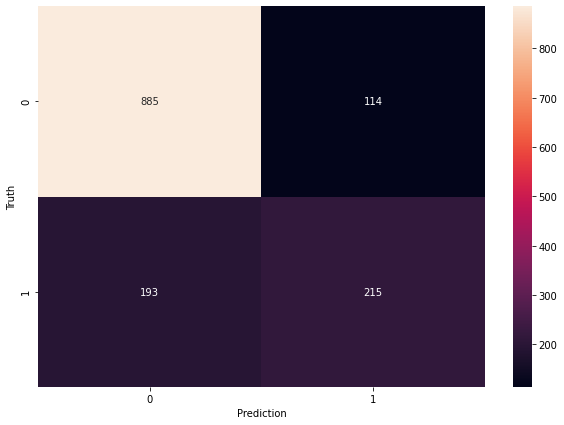

In [41]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')